In [6]:
import numpy as np
import os
import json
import keras
path=os.path.join(os.getcwd(),"reviews.json")
f=open(path,"r")
for line in f:
        line=json.loads(line)

Using TensorFlow backend.


In [22]:
imdb = keras.datasets.imdb
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
print(len(word_index.values()))
keys=word_index.keys()

88588


In [23]:
rated_reviews=[]
nonrated_reviews=[]
rated=[]
nonrated=[]
x=0
y=0

for key in line:
        reviews=line[key]
        for review in reviews:
                if(review['rating']!=None):
                        rated_reviews.append(np.array([review['review'],review['rating']],dtype=object))
                        x=x+1
                else:
                        nonrated_reviews.append(review['review'])
                        y=y+1
        rated.append(x)
        nonrated.append(y)
        x=0
        y=0
rated_reviews=np.array(rated_reviews,dtype=object)
nonrated_reviews=np.array(nonrated_reviews,dtype=object)
print(len(line.keys()))
print(len(rated_reviews)+len(nonrated_reviews))
print(len(rated_reviews))
print(len(nonrated_reviews))

250
209547
182689
26858


In [28]:
X=[]
y=[]
num_word=[]
for item in rated_reviews:
    for i in item[0].split(" "):
        if i in keys:
            num_word.append(word_index[i])
    X.append(np.unique(np.array(num_word)))
    num_word=[]
    y.append((item[1]-1))

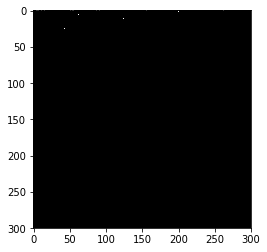

In [39]:
sample=np.zeros(90000)
%matplotlib inline
import matplotlib.pyplot as plt
for index in X[500]:
    sample[index]=1
sample=sample.reshape(300,300)
plt.imshow(sample,cmap='gray')

In [43]:
from PIL import Image
img = Image.fromarray(sample, 'RGB')
img.save('my.jpg')
img.show()

In [47]:
import matplotlib.image as mpimg
img=mpimg.imread('my.jpg')
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [49]:
rgb2gray(img)

array([[0.57, 0.57, 0.57, ..., 0.  , 0.  , 0.  ],
       [0.57, 0.57, 0.57, ..., 0.  , 0.  , 0.  ],
       [0.57, 0.57, 0.57, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [50]:
img

array([[[0, 0, 5],
        [0, 0, 5],
        [0, 0, 5],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 5],
        [0, 0, 5],
        [0, 0, 5],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 5],
        [0, 0, 5],
        [0, 0, 5],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [51]:
sample

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])